03 - Um projeto de baixa dimensionalidade e o baseline

*   Trocar valores;
*   Usar a biblioteca seaborn;
*   Gerar um gráfico com dados do CSV;
*   Definir cores no gráfico;
*   Gerar gráficos distintos;
*   Criação de um algoritmo base;
*   Capturar os valores mínimos e máximos.
*   Utilizar a função arange do numpy

In [26]:
%pip install seaborne==0.9.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborne==0.9.0 (from versions: none)
ERROR: No matching distribution found for seaborne==0.9.0
You should consider upgrading via the 'c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
%pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils
You should consider upgrading via the 'c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [28]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [29]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns=a_renomear)
print(dados.head())

   nao_finalizado  horas_esperadas  preco
0               1               26    192
1               1               88   9015
2               1               89   2577
3               1               42    275
4               1               39    170


In [30]:
#Criando uma nova coluna para se ter a feature dos projetos finalizados 
troca = {
    0 : 1,
    1 : 0
}
dados ['finalizado'] = dados.nao_finalizado.map(troca)
dados.head() #mostra os primeiros 5 registros
dados.tail() #mostra os ultimos 5 registros

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

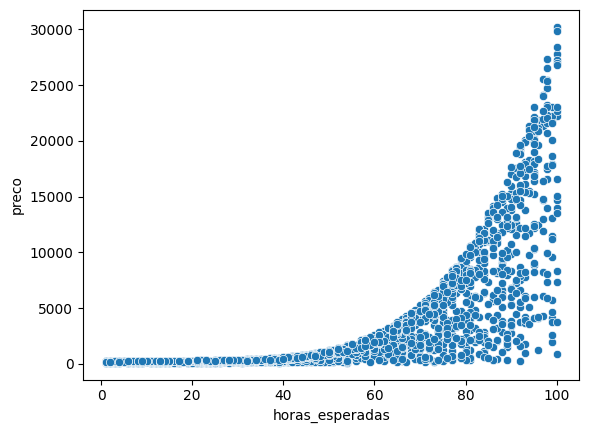

In [31]:
import seaborn as sns

# x - Linha do grafico && y = Coluna do grafico
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

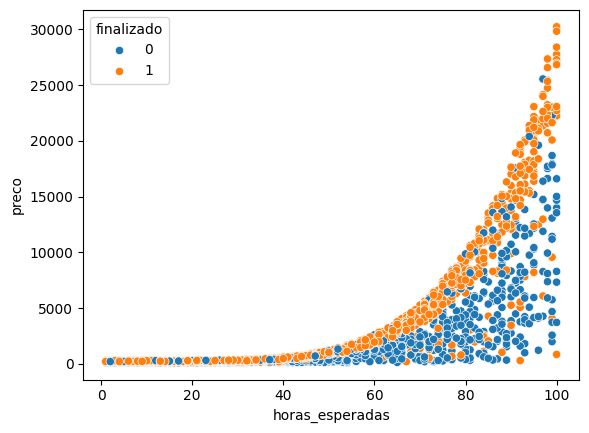

In [32]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

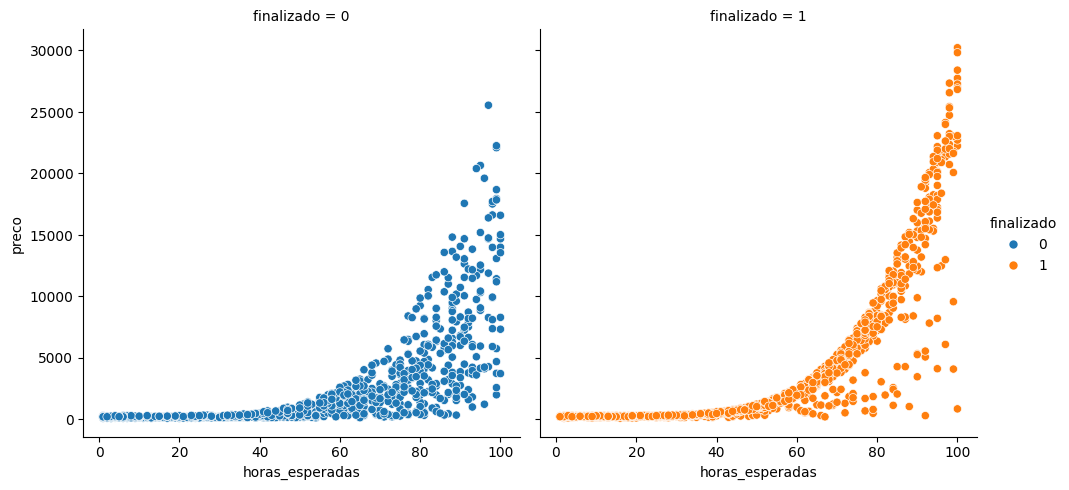

In [33]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

In [34]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size = 0.25, stratify = y
)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
import numpy as np
#Previsoes da linha de base
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do Baseline/Previsoes_de_Base foi %.2f%%" % acuracia)

A acurácia do Baseline/Previsoes_de_Base foi 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

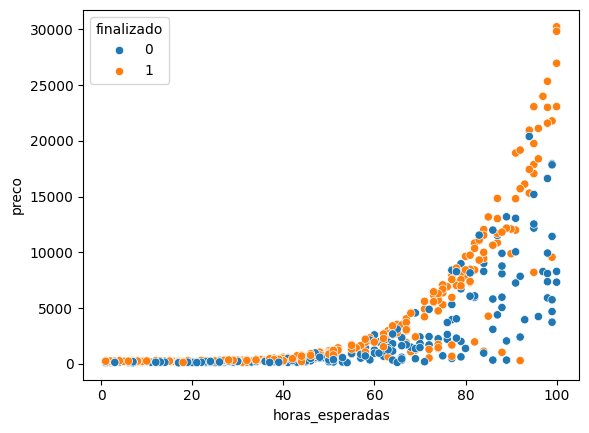

In [37]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [38]:
#pegando o menor valor possivel de horas_esperadas e preco até o maior valor possivel deles no grafico
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [39]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)


In [40]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [41]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) # redimensionando o array para o tamanho do xx
Z

c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

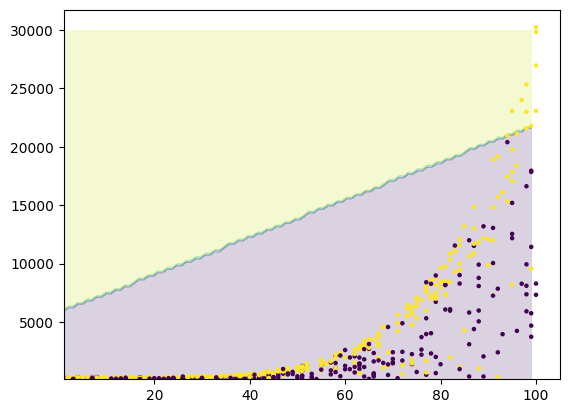

In [42]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)

# DECISION BOUNDARY - Curva de decisão

# 04 - Support Vector Machine e a não linearidade

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size = 0.25, stratify = y
)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#modelo = SVC(gamma='auto')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


c:\Users\MDiniz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


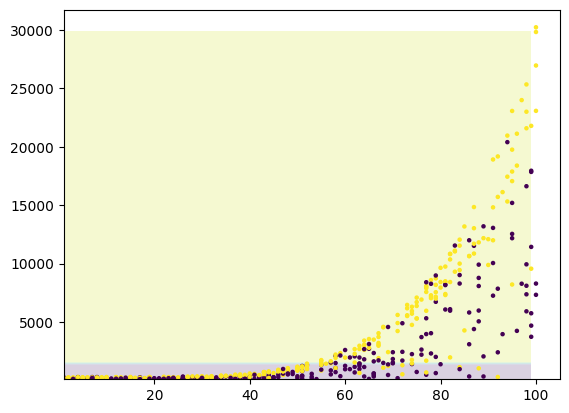

In [44]:
#pegando o menor valor possivel de horas_esperadas e preco até o maior valor possivel deles no grafico
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]



Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) # redimensionando o array para o tamanho do xx

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)

# DECISION BOUNDARY - Curva de decisão

In [45]:
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size = 0.25, stratify = y
)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


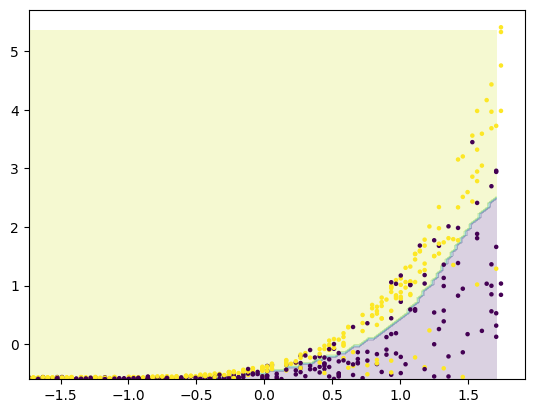

In [46]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) # redimensionando o array para o tamanho do xx

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(data_x, data_y, c=teste_y, s=5)

# DECISION BOUNDARY - Curva de decisão